## 1. Setting

In [80]:
import os
PROJECT_PATH = "./.."
os.chdir(project_path)

import datetime
import requests
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from lib.config import *
import lib.inputManager as IM
import lib.statistic as STAT
import lib.jeju as JEJU
from lib.jeju import *


# 한글 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

## 2. Data Loading

In [81]:
# 데이터 기간 설정
start_date = datetime.datetime(2019, 6, 1)
end_date = datetime.datetime(2019, 8, 29)

# 로딩할 파일 명 리스트 생성
input_path_list = IM.make_input_path(start_date, end_date)

# 전체 데이터 로딩 (multi)
usage_df = IM.parallel_load_total_usage_df(input_path_list)

station_df = pd.read_csv(STATION_DF_PATH, encoding = DEFAULT_ENCODING)
user_df    = pd.read_csv(USER_DF_PATH, encoding = DEFAULT_ENCODING)

0it [00:00, ?it/s]


## 3 Statistical data of Jeju tourist

#### 3.1 Num of tourist

In [82]:
jeju_user_num_df = JEJU.get_jeju_tourist_num_df(TOURIST_NUM_STATS_DATA, DOMESTIC_BUS_USAGE_RATIO, FOREIGN_BUS_USAGE_RATIO)
jeju_user_num_df.loc["total"] = jeju_user_num_df.sum() # 합계 계산
jeju_user_num_df

,domestic_tourist,foreign_tourist,total_tourist,domestic_bus_tourist,foreign_bus_tourist,total_bus_tourist
2019_Jun,1155020,152197,1307217,36960,32113,69073
2019_Jul,1157447,152629,1310076,37038,32204,69242
2019_Aug,1243132,178323,1421455,39780,37626,77406
total,3555599,483149,4038748,113778,101943,215721


#### 3.2 Distribution of stay period

In [109]:
jeju_stay_period_df = JEJU.get_jeju_stay_period_df(STAY_PERIOD_STATS_DATA, jeju_user_num_df)
jeju_stay_period_df

,period,domestic_tourist,foreign_tourist,total_tourist
0,1,0.003,0.006,0.004418
1,2,0.057,0.066,0.061253
2,3,0.618,0.280,0.458272
3,4,0.238,0.296,0.265409
4,5,0.045,0.217,0.126282
5,6,0.013,0.055,0.032848
6,7,0.015,0.035,0.024451
7,8,0.003,0.019,0.010561
8,9,0.001,0.006,0.003363
9,10,0.001,0.004,0.002418


#### 3.3 Graph of stay period

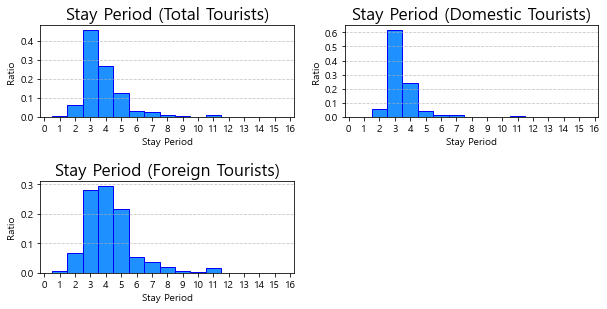

In [84]:
# df에서 x와 y속성을 넘기면 해당 데이터에 대한 막대그래프을 생성하여 반환
def draw_bar_graph_from_df_by_one_column(df, x_column, y_column, title, x_label, y_label):
    df = df[[x_column, y_column]]
    x = df[x_column]
    y = df[y_column]
    plt.title(title, fontsize=17)
    plt.xlabel(x_label, fontsize = 10)
    plt.ylabel(y_label, fontsize = 10)
    plt.grid(True, axis='y', linestyle="--", alpha = 0.7)
    return plt.bar(x, y, width=1, color = "dodgerblue", edgecolor="b")

# df에서 x와 y속성들에 대한 막대그래프를 생성하여 반환
def draw_bar_graph_from_df_by_all_columns(df, x_column, y_columns, titles, x_label, y_label):
    n = len(y_columns)
    for i in range(n):
        plt.subplot(n, 2, i+1)
        plt.xticks(np.arange(0, 17, 1))
        plt.yticks(np.arange(0, 1, 0.1))
        draw_bar_graph_from_df_by_one_column(df, x_column, y_columns[i], titles[i], x_label, y_label)


y_columns = ["total_tourist",
             "domestic_tourist",
             "foreign_tourist"]

titles    = ["Stay Period (Total Tourists)",
             "Stay Period (Domestic Tourists)",
             "Stay Period (Foreign Tourists)"]

plt.figure(figsize=(10, 8))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.8, wspace=0.2, hspace=0.7)
draw_bar_graph_from_df_by_all_columns(jeju_stay_period_df, "period", y_columns, titles, "Stay Period", "Ratio")
plt.savefig("ccc.svg")

#### 3.5 Statistic about stay period

In [85]:
jeju_stay_ratio_stats_df = STAT.get_stats_df_from_ratio_df_by_all_columns(jeju_stay_period_df, "period")
jeju_stay_ratio_stats_df

,mean,variancd,std_divation
domestic_tourist,3.440000,79.226667,8.900936
foreign_tourist,4.244000,78.422667,8.855657
total_tourist,3.819945,78.846721,8.879568


## 4. Verification of access type characteristic

#### 4.1 Num of user per access type

In [86]:
df = user_df
bus_count_df1 = STAT.get_count_df(user_df, "case", "total_count")

df = df[(2<=df["period"]) & (df["period"]<=15)]
bus_count_df2 = STAT.get_count_df(df, "case", "target_count")
bus_count_df = pd.merge(bus_count_df1, bus_count_df2, on="case")
bus_count_df["total_count_ration"] = bus_count_df["total_count"]/bus_count_df["total_count"].sum()
bus_count_df["target_count_ration"] = bus_count_df["target_count"]/bus_count_df["target_count"].sum()
bus_count_df

,case,total_count,target_count,total_count_ration,target_count_ration
0,both,47629,37838,0.065587,0.184316
1,first,131112,49778,0.180547,0.242478
2,last,55006,21143,0.075746,0.102991
3,neither,492445,96530,0.678120,0.470215


#### 4.2 Distribution of stay period per access type

In [87]:
df = user_df
df = df[(2<=df["period"]) & (df["period"]<=15)]

df_list = [df, 
           df[df["case"] == "both"], 
           df[df["case"] == "first"], 
           df[df["case"] == "last"],
           df[df["case"] == "neither"]]
result_columns = ["total_user", 
                  "both_user", 
                  "first_user", 
                  "last_user", 
                  "neither_user"]

bus_stay_period_df = STAT.get_ratio_df_from_all_df(df_list, "period", result_columns)
bus_stay_period_df

,period,total_user,both_user,first_user,last_user,neither_user
0,2,0.260355,0.156324,0.272912,0.280187,0.290314
1,3,0.258329,0.309636,0.307927,0.290403,0.205615
2,4,0.162844,0.264655,0.183756,0.183607,0.107604
3,5,0.080301,0.112955,0.084033,0.076858,0.066332
4,6,0.045565,0.049236,0.039917,0.042473,0.047716
5,7,0.035526,0.033643,0.028928,0.030128,0.040847
6,8,0.033494,0.025001,0.020571,0.022655,0.045861
7,9,0.022719,0.013954,0.012998,0.014000,0.033078
8,10,0.018072,0.009541,0.009663,0.011067,0.027287
9,11,0.016416,0.007294,0.007574,0.009696,0.026023


#### 4.3 Merging with jeju statistical data

In [88]:
# 통계 데이터와 병합
merged_stay_period_df = pd.merge(bus_stay_period_df, jeju_stay_period_df, on="period", how="inner")
merged_stay_period_df

,period,total_user,both_user,first_user,last_user,neither_user,domestic_tourist,foreign_tourist,total_tourist
0,2,0.260355,0.156324,0.272912,0.280187,0.290314,0.057,0.066,0.061253
1,3,0.258329,0.309636,0.307927,0.290403,0.205615,0.618,0.280,0.458272
2,4,0.162844,0.264655,0.183756,0.183607,0.107604,0.238,0.296,0.265409
3,5,0.080301,0.112955,0.084033,0.076858,0.066332,0.045,0.217,0.126282
4,6,0.045565,0.049236,0.039917,0.042473,0.047716,0.013,0.055,0.032848
5,7,0.035526,0.033643,0.028928,0.030128,0.040847,0.015,0.035,0.024451
6,8,0.033494,0.025001,0.020571,0.022655,0.045861,0.003,0.019,0.010561
7,9,0.022719,0.013954,0.012998,0.014000,0.033078,0.001,0.006,0.003363
8,10,0.018072,0.009541,0.009663,0.011067,0.027287,0.001,0.004,0.002418
9,11,0.016416,0.007294,0.007574,0.009696,0.026023,0.006,0.016,0.010726


#### 4.4 Analysis of distribution

In [89]:
merged_stay_period_stats_df = STAT.get_stats_df_from_ratio_df_by_all_columns(merged_stay_period_df, "period")
merged_stay_period_stats_df

,mean,variancd,std_divation
total_user,4.608678,83.891322,9.159221
both_user,4.138353,84.361647,9.184860
first_user,3.959199,84.540801,9.194607
last_user,4.072979,84.427021,9.188418
neither_user,5.245292,83.254708,9.124402
domestic_tourist,3.437000,85.063000,9.222960
foreign_tourist,4.238000,84.262000,9.179434
total_tourist,3.815528,84.684472,9.202417


#### 4.5 .Distribution Graph

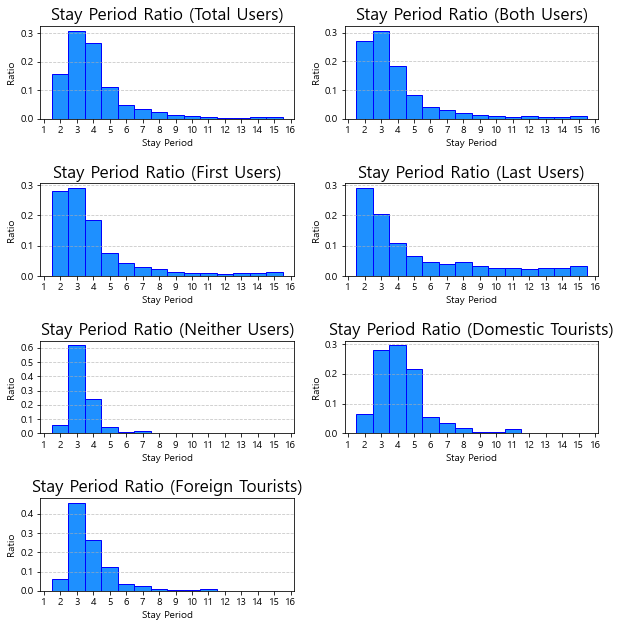

In [90]:
df = merged_stay_period_df

y_columns = list(df.columns)
y_columns.remove("period")
y_columns.remove("total_user")
titles = ["Stay Period Ratio (Total Users)",
         "Stay Period Ratio (Both Users)",
         "Stay Period Ratio (First Users)",
         "Stay Period Ratio (Last Users)",
         "Stay Period Ratio (Neither Users)",
         "Stay Period Ratio (Domestic Tourists)",
         "Stay Period Ratio (Foreign Tourists)",
         "Stay Period Ratio (Totol Tourists)"]

plt.figure(figsize=(10, 18))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.7)
draw_bar_graph_from_df_by_all_columns(merged_stay_period_df, "period", y_columns, titles, "Stay Period", "Ratio")
plt.savefig("ccc.svg")

#### 4.6 Analysis of similarity between tag and statstical data

In [91]:
# 전체 이용자 및 4가지 유형별 이용자에 대한 유사도 계산 및 출력
type_list = ["total_user", "both_user", "first_user", "last_user", "neither_user"]

for i, t in enumerate(type_list):
    intersector_ratio = STAT.how_much_overlap(merged_stay_period_df, "total_tourist", t)
    print("%12s intersection ratio = %f.3"% (t, intersector_ratio));

  total_user intersection ratio = 0.647093.3
   both_user intersection ratio = 0.829434.3
  first_user intersection ratio = 0.718184.3
   last_user intersection ratio = 0.695458.3
neither_user intersection ratio = 0.525170.3


## 5. Verification of num of tour station visit characteristic

#### 5.1 Num of user per  num of tour station visit

In [92]:
bus_count_df = STAT.get_count_df(user_df, "tour_count", "count")
print(bus_count_df["count"].sum())
bus_count_df[bus_count_df["tour_count"] < 6]["count"].sum()/bus_count_df["count"].sum()
bus_count_df[bus_count_df["tour_count"] == 5]["count"].sum()/bus_count_df["count"].sum()#### 4.1 Num of user per access type

726192


0.03897178707559433

#### 5.2 Distribution of stay period per num of tour station visit

In [93]:
df = user_df
df = df[(2<=df["period"]) & (df["period"]<=15)]

df_list = []
target_column = "period"
result_columns = []
term = 1

# max_tour_count = bus_count_df[bus_count_df["count"]>200]["tour_count"].max()
max_tour_count = 5

# for i in range(0, max_tour_count, term):
#     df_list.append(df[(i <= df["tour_count"]) & (df["tour_count"] < i+term)])
#     result_columns.append(str(i)+"~"+str(i+term-1))

for i in range(0, max_tour_count+1, term):
    df_list.append(df[i <= df["tour_count"]])
    result_columns.append("count = "+str(i))               
                  
                  
bus_stay_period_df = STAT.get_ratio_df_from_all_df(df_list, target_column, result_columns)
bus_stay_period_df

,period,count = 0,count = 1,count = 2,count = 3,count = 4,count = 5
0,2,0.260355,0.260192,0.240203,0.205465,0.167177,0.131600
1,3,0.258329,0.286039,0.302655,0.313260,0.314874,0.304626
2,4,0.162844,0.179888,0.196847,0.220826,0.240558,0.256772
3,5,0.080301,0.081778,0.088606,0.099809,0.112261,0.127155
4,6,0.045565,0.042536,0.043323,0.046317,0.051868,0.059382
5,7,0.035526,0.031597,0.030549,0.031344,0.034356,0.039356
6,8,0.033494,0.026089,0.022974,0.021197,0.022005,0.024973
7,9,0.022719,0.017697,0.015000,0.013223,0.012971,0.013402
8,10,0.018072,0.013747,0.011354,0.009571,0.009478,0.010155
9,11,0.016416,0.012407,0.010366,0.008725,0.008335,0.008150


#### 5.3 Merging with jeju statistical data

In [94]:
# 통계 데이터와 병합
merged_stay_period_df = pd.merge(bus_stay_period_df, jeju_stay_period_df, on="period", how="inner")
merged_stay_period_df

,period,count = 0,count = 1,count = 2,count = 3,count = 4,count = 5,domestic_tourist,foreign_tourist,total_tourist
0,2,0.260355,0.260192,0.240203,0.205465,0.167177,0.131600,0.057,0.066,0.061253
1,3,0.258329,0.286039,0.302655,0.313260,0.314874,0.304626,0.618,0.280,0.458272
2,4,0.162844,0.179888,0.196847,0.220826,0.240558,0.256772,0.238,0.296,0.265409
3,5,0.080301,0.081778,0.088606,0.099809,0.112261,0.127155,0.045,0.217,0.126282
4,6,0.045565,0.042536,0.043323,0.046317,0.051868,0.059382,0.013,0.055,0.032848
5,7,0.035526,0.031597,0.030549,0.031344,0.034356,0.039356,0.015,0.035,0.024451
6,8,0.033494,0.026089,0.022974,0.021197,0.022005,0.024973,0.003,0.019,0.010561
7,9,0.022719,0.017697,0.015000,0.013223,0.012971,0.013402,0.001,0.006,0.003363
8,10,0.018072,0.013747,0.011354,0.009571,0.009478,0.010155,0.001,0.004,0.002418
9,11,0.016416,0.012407,0.010366,0.008725,0.008335,0.008150,0.006,0.016,0.010726


#### 4.4 Analysis of distribution

In [95]:
merged_stay_period_stats_df = STAT.get_stats_df_from_ratio_df_by_all_columns(merged_stay_period_df, "period")
merged_stay_period_stats_df

,mean,variancd,std_divation
count = 0,4.608678,83.891322,9.159221
count = 1,4.277513,84.222487,9.177281
count = 2,4.156398,84.343602,9.183877
count = 3,4.120242,84.379758,9.185846
count = 4,4.186388,84.313612,9.182244
count = 5,4.312864,84.187136,9.175355
domestic_tourist,3.437000,85.063000,9.222960
foreign_tourist,4.238000,84.262000,9.179434
total_tourist,3.815528,84.684472,9.202417


#### 5.5 .Distribution Graph

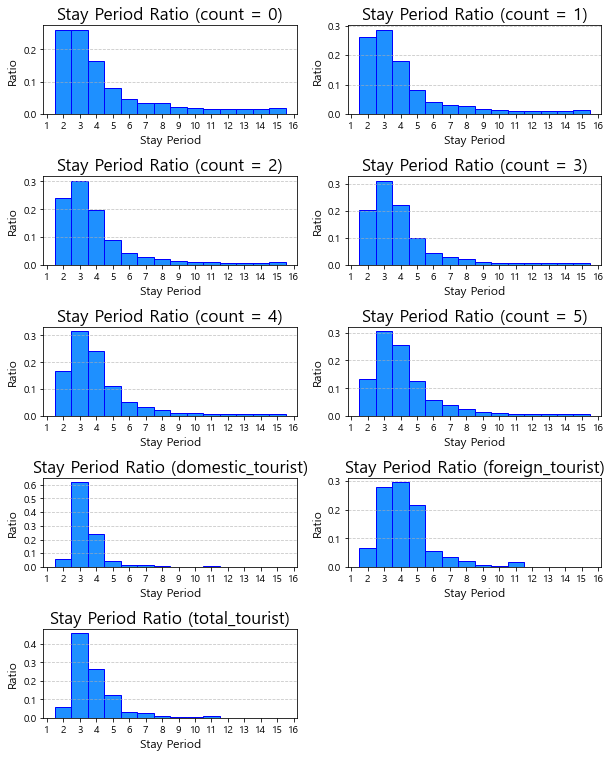

In [96]:
# df에서 x와 y속성을 넘기면 해당 데이터에 대한 막대그래프을 생성하여 반환
def draw_bar_graph_from_df_by_one_column(df, x_column, y_column, title, x_label, y_label):
    df = df[[x_column, y_column]]
    x = df[x_column]
    y = df[y_column]
    plt.title(title, fontsize=17)
    plt.xlabel(x_label, fontsize = 12)
    plt.ylabel(y_label, fontsize = 12)
    plt.grid(True, axis='y', linestyle="--", alpha = 0.7)
    return plt.bar(x, y, width=1, color = "dodgerblue", edgecolor="b")

# df에서 x와 y속성들에 대한 막대그래프를 생성하여 반환
def draw_bar_graph_from_df_by_all_columns(df, x_column, y_columns, titles, x_label, y_label):
    n = len(y_columns)
    for i in range(n):
        plt.subplot(n, 2, i+1)
        plt.xticks(np.arange(0, 17, 1))
        plt.yticks(np.arange(0, 1, 0.1))
        draw_bar_graph_from_df_by_one_column(df, x_column, y_columns[i], titles[i], x_label, y_label)


df = merged_stay_period_df

y_columns = list(df.columns)
y_columns.remove("period")

titles = pd.Series(y_columns).apply(lambda x : "Stay Period Ratio (%s)"%x)

plt.figure(figsize=(10, 20))
plt.subplots_adjust(left=0.125, bottom=0.0, right=0.9, top=0.9, wspace=0.2, hspace=0.7)
draw_bar_graph_from_df_by_all_columns(df, "period", y_columns, titles, "Stay Period", "Ratio")
plt.savefig("ccc.svg")

#### 5.6 Analysis of similarity between tag and statstical data

In [97]:
# 전체 이용자 및 4가지 유형별 이용자에 대한 유사도 계산 및 출력
type_list = list(merged_stay_period_df.columns)
remove_elements = ["period", "domestic_tourist", "foreign_tourist", "total_tourist"]
for element in remove_elements:
    type_list.remove(element)
    
for i, t in enumerate(type_list):
    intersector_ratio = STAT.how_much_overlap(merged_stay_period_df, "total_tourist", t)
    print("%13s intersection ratio = %.3f"% (t, intersector_ratio));

    count = 0 intersection ratio = 0.647
    count = 1 intersection ratio = 0.693
    count = 2 intersection ratio = 0.733
    count = 3 intersection ratio = 0.778
    count = 4 intersection ratio = 0.811
    count = 5 intersection ratio = 0.831


#### 5.7 further analysis

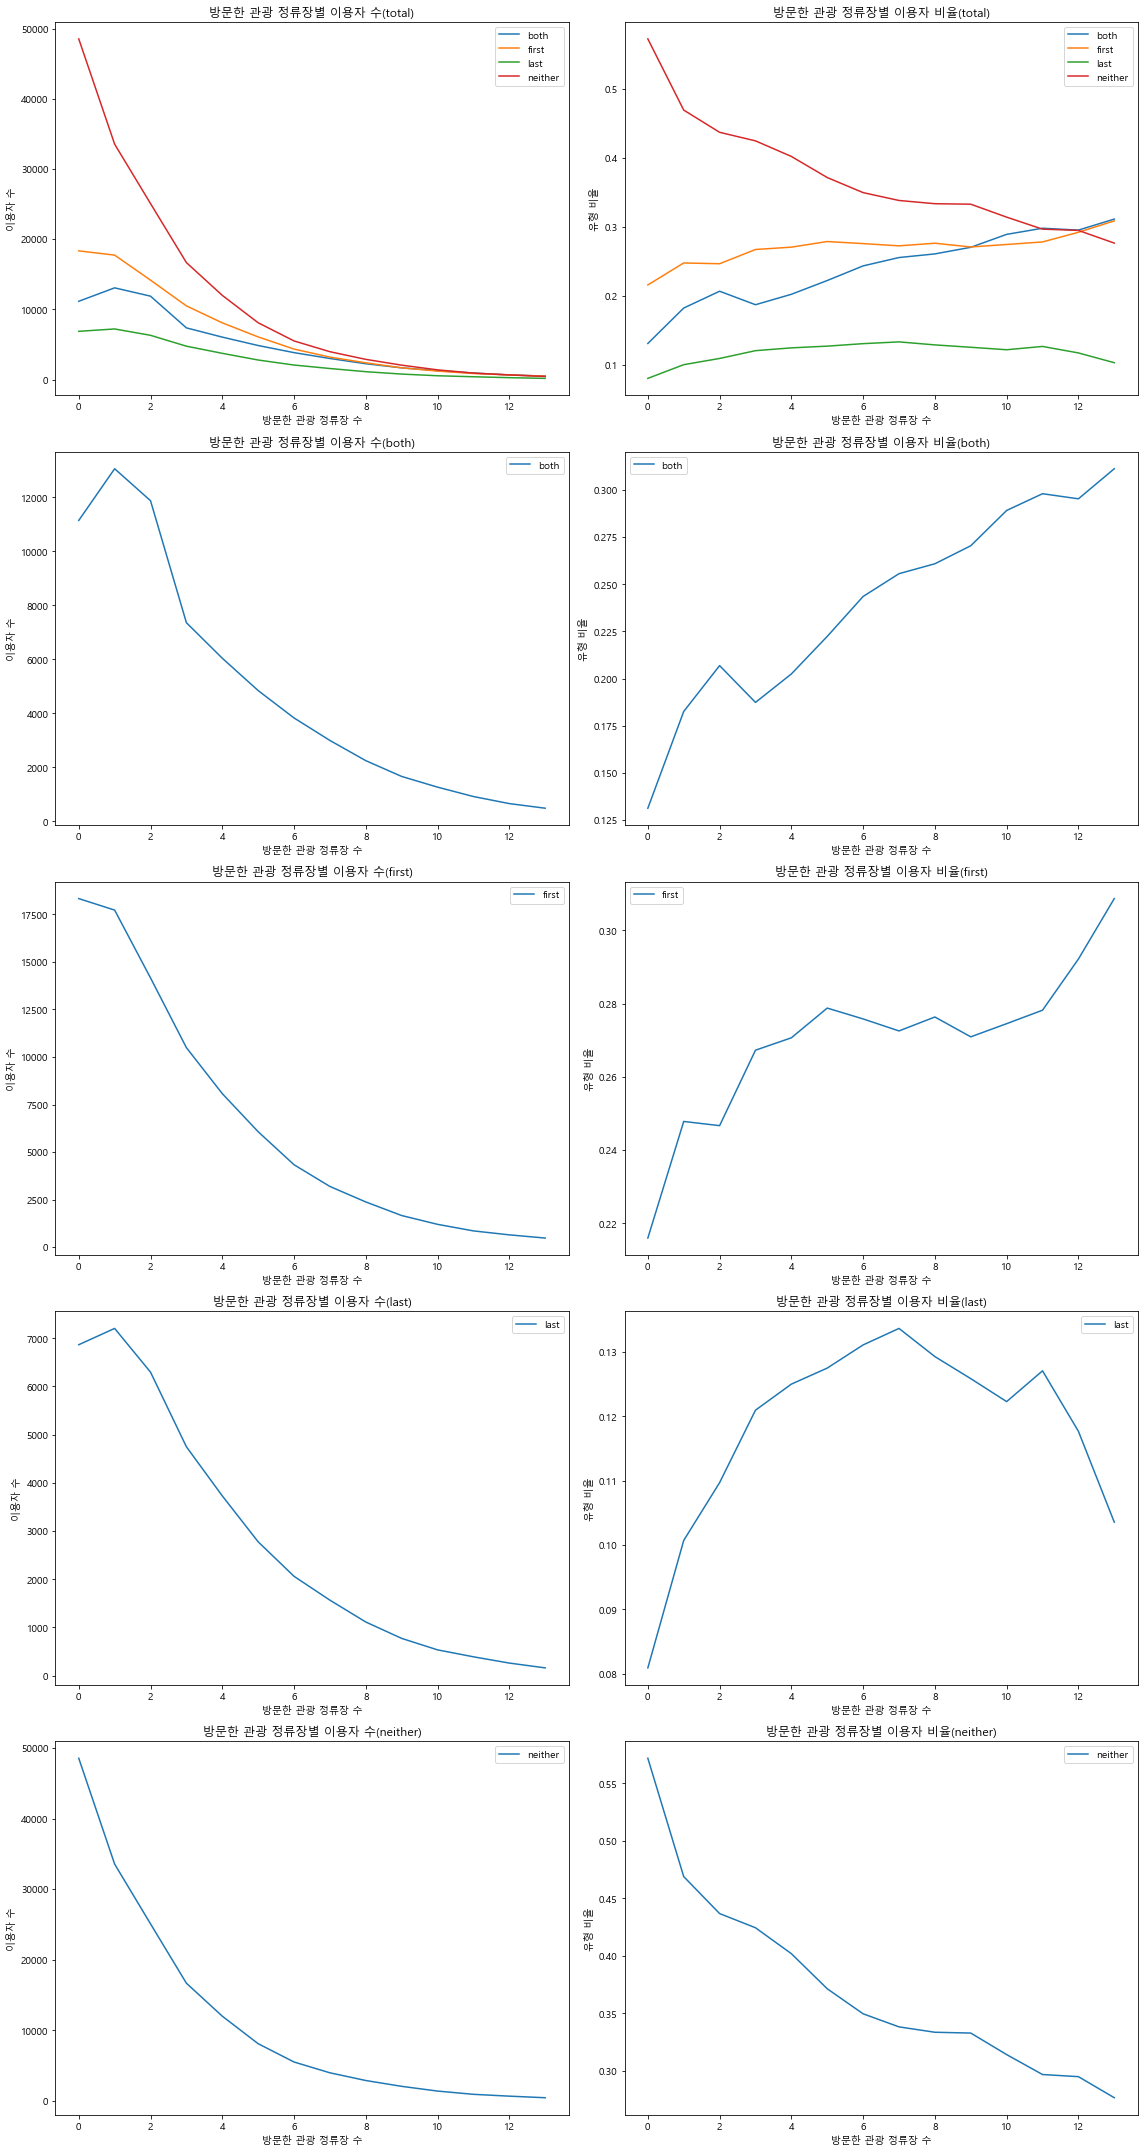

In [98]:
def draw_tour_visit_analysis_graph(user_df):
    # 데이터 분석
    columns = ['both', 'first', 'last', 'neither']
    ratio_values = {}
    count_values = {}
    for column in columns:
        count_values[column] = []
        ratio_values[column] = []

    max_visit = int(user_df["tour_count"].max())
    for i in range(max_visit):
        sample_df = user_df[(i <=user_df["tour_count"]) & (user_df["tour_count"] <= i+1)]
        total_count = len(sample_df)
        for column in columns:
            count = len(sample_df[sample_df["case"] == column])
            count_values[column].append(count)
            ratio_values[column].append(count/total_count)
    
    # 그래프 그리기
    plt.figure(figsize=(16, 30))
    
    # 그래프 - 전체 그래프
    plt.subplot(5, 2, 1)
    for idx, column in enumerate(columns):
        plt.plot(list(range(0, max_visit, 1)), count_values[column])
        plt.legend(columns, loc = 0)
        plt.title('방문한 관광 정류장별 이용자 수({})'.format("total"))
        plt.xlabel("방문한 관광 정류장 수")
        plt.ylabel("이용자 수") 
        
    # 그래프 - 유형별 그래프
    plt.subplot(5, 2, 2)
    for idx, column in enumerate(columns):
        plt.plot(list(range(0, max_visit, 1)), ratio_values[column])
        plt.legend(columns, loc = 0)
        plt.title('방문한 관광 정류장별 이용자 비율({})'.format("total"))
        plt.xlabel("방문한 관광 정류장 수")
        plt.ylabel("유형 비율")
        
    for idx, column in enumerate(columns):
        
        plt.subplot(5, 2, 2*(idx)+3)
        plt.plot(list(range(0, max_visit, 1)), count_values[column])
        plt.legend([columns[idx]], loc = 0)
        plt.title('방문한 관광 정류장별 이용자 수({})'.format(column))
        plt.xlabel("방문한 관광 정류장 수")
        plt.ylabel("이용자 수")

        plt.subplot(5, 2, 2*(idx)+4)
        plt.plot(list(range(0, max_visit, 1)), ratio_values[column])
        plt.legend([columns[idx]], loc = 0)
        plt.title('방문한 관광 정류장별 이용자 비율({})'.format(column))
        plt.xlabel("방문한 관광 정류장 수")
        plt.ylabel("유형 비율")
    plt.tight_layout() 
    return plt

df = user_df
df = df[(2<=df["period"]) & (df["period"]<=15)] # 통계 자료가 보여주는 체류기간 내에서만 분석한다.
df = df[df["tour_count"]<15] # 방문 횟수가 15회를 넘어가면 이용자 수가 매우 적어 노이즈가 될 수 있다.
plt = draw_tour_visit_analysis_graph(df)
plt.show()

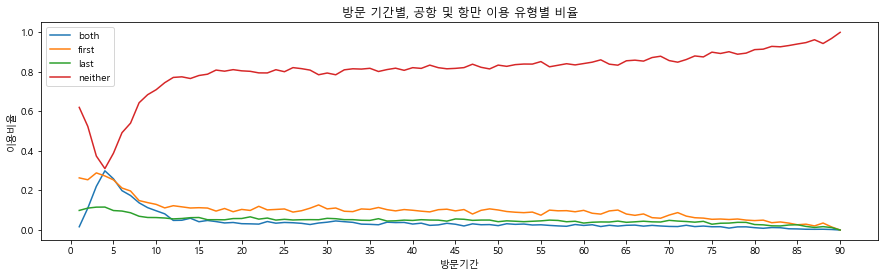

In [99]:
def draw_period_analysis_graph(user_df):
    wedgeprops={'width': 0.65, 'edgecolor': 'w', 'linewidth': 5}

    columns = ['both', 'first', 'last', 'neither']
    values = [[], [], [], []]
    period = 90
    term = 1
    for period in list(range(1, period+1, term)):
        user_df2 = user_df[(period-1 < user_df['period']) & (user_df['period'] <= period)]
        for i in range(4):
            sum = len(user_df2)
            values[i].append(len(user_df2[user_df2["case"] == columns[i]])/sum)

    plt.rcParams["figure.figsize"] = (15,4)
    for i in list(range(4)):
        plt.plot(list(range(1, period+1, term)), values[i])

    plt.legend(columns)
    plt.title('방문 기간별, 공항 및 항만 이용 유형별 비율')
    plt.xlabel("방문기간")
    plt.ylabel("이용비율")
    plt.xticks(list(range(0, period+1, 5)))
    plt.show()
    return plt


plt = draw_period_analysis_graph(user_df)
plt.show()

## 6. Verification of use ratio characteristic

#### 6.1 Num of user per use ration

In [100]:
df = user_df
df = df[(2<=df["period"]) & (df["period"]<=15)]
STAT.get_count_df(df, "usage_ratio", "ratio")

,usage_ratio,ratio
0,13,1414
1,14,1081
2,15,965
3,16,962
4,18,1078
5,20,2230
6,21,622
7,22,1581
8,23,664
9,25,3172


#### 6.2 Distribution of stay period per use ratio

In [101]:
df = user_df
df = df[(2<=df["period"]) & (df["period"]<=15)]

df_list = []
target_column = "period"
result_columns = []
term = 10

# for i in range(0, 100, term):
#     df_list.append(df[(i < df["usage_ratio"]) & (df["usage_ratio"] <= i+term)])
#     result_columns.append(str(i)+"~"+str(i+term-1))

for i in range(0, 100, term):
    df_list.append(df[i <= df["usage_ratio"]])
    result_columns.append(str(i)+"~")               
                  
bus_stay_period_df = STAT.get_ratio_df_from_all_df(df_list, target_column, result_columns)
bus_stay_period_df

,period,0~,10~,20~,30~,40~,50~,60~,70~,80~,90~
0,2,0.260355,0.260355,0.267522,0.284892,0.298049,0.312702,0.341811,0.411829,0.451004,0.479875
1,3,0.258329,0.258329,0.265440,0.282675,0.295730,0.310268,0.339151,0.255790,0.280122,0.298054
2,4,0.162844,0.162844,0.167327,0.178191,0.186420,0.195585,0.155736,0.187638,0.132741,0.141238
3,5,0.080301,0.080301,0.082512,0.087869,0.091928,0.069283,0.075732,0.067244,0.073640,0.046625
4,6,0.045565,0.045565,0.046819,0.049859,0.034959,0.036677,0.029559,0.024819,0.027179,0.015811
5,7,0.035526,0.035526,0.036504,0.026363,0.027581,0.021056,0.016583,0.019980,0.014522,0.007712
6,8,0.033494,0.033494,0.034416,0.023251,0.016969,0.017803,0.014178,0.011273,0.007021,0.003385
7,9,0.022719,0.022719,0.023345,0.016433,0.011638,0.008858,0.006958,0.005517,0.003375,0.001490
8,10,0.018072,0.018072,0.018570,0.013112,0.009525,0.007214,0.005711,0.004854,0.003468,0.002002
9,11,0.016416,0.016416,0.011472,0.008720,0.006625,0.005365,0.004355,0.003891,0.002683,0.001589


#### 6.3 Merging with jeju statistical data

In [102]:
# 통계 데이터와 병합
merged_stay_period_df = pd.merge(bus_stay_period_df, jeju_stay_period_df, on="period", how="inner")
merged_stay_period_df

,period,0~,10~,20~,30~,40~,50~,60~,70~,80~,90~,domestic_tourist,foreign_tourist,total_tourist
0,2,0.260355,0.260355,0.267522,0.284892,0.298049,0.312702,0.341811,0.411829,0.451004,0.479875,0.057,0.066,0.061253
1,3,0.258329,0.258329,0.265440,0.282675,0.295730,0.310268,0.339151,0.255790,0.280122,0.298054,0.618,0.280,0.458272
2,4,0.162844,0.162844,0.167327,0.178191,0.186420,0.195585,0.155736,0.187638,0.132741,0.141238,0.238,0.296,0.265409
3,5,0.080301,0.080301,0.082512,0.087869,0.091928,0.069283,0.075732,0.067244,0.073640,0.046625,0.045,0.217,0.126282
4,6,0.045565,0.045565,0.046819,0.049859,0.034959,0.036677,0.029559,0.024819,0.027179,0.015811,0.013,0.055,0.032848
5,7,0.035526,0.035526,0.036504,0.026363,0.027581,0.021056,0.016583,0.019980,0.014522,0.007712,0.015,0.035,0.024451
6,8,0.033494,0.033494,0.034416,0.023251,0.016969,0.017803,0.014178,0.011273,0.007021,0.003385,0.003,0.019,0.010561
7,9,0.022719,0.022719,0.023345,0.016433,0.011638,0.008858,0.006958,0.005517,0.003375,0.001490,0.001,0.006,0.003363
8,10,0.018072,0.018072,0.018570,0.013112,0.009525,0.007214,0.005711,0.004854,0.003468,0.002002,0.001,0.004,0.002418
9,11,0.016416,0.016416,0.011472,0.008720,0.006625,0.005365,0.004355,0.003891,0.002683,0.001589,0.006,0.016,0.010726


#### 6.4 Analysis of distribution

In [103]:
merged_stay_period_stats_df = STAT.get_stats_df_from_ratio_df_by_all_columns(merged_stay_period_df, "period")
merged_stay_period_stats_df

,mean,variancd,std_divation
0~,4.608678,83.891322,9.159221
10~,4.608678,83.891322,9.159221
20~,4.373714,84.126286,9.172038
30~,3.998561,84.501439,9.192466
40~,3.776547,84.723453,9.204534
50~,3.607823,84.892177,9.213695
60~,3.414179,85.085821,9.224198
70~,3.293169,85.206831,9.230755
80~,3.113401,85.386599,9.240487
90~,2.907945,85.592055,9.251597


#### 6.5 .Distribution Graph

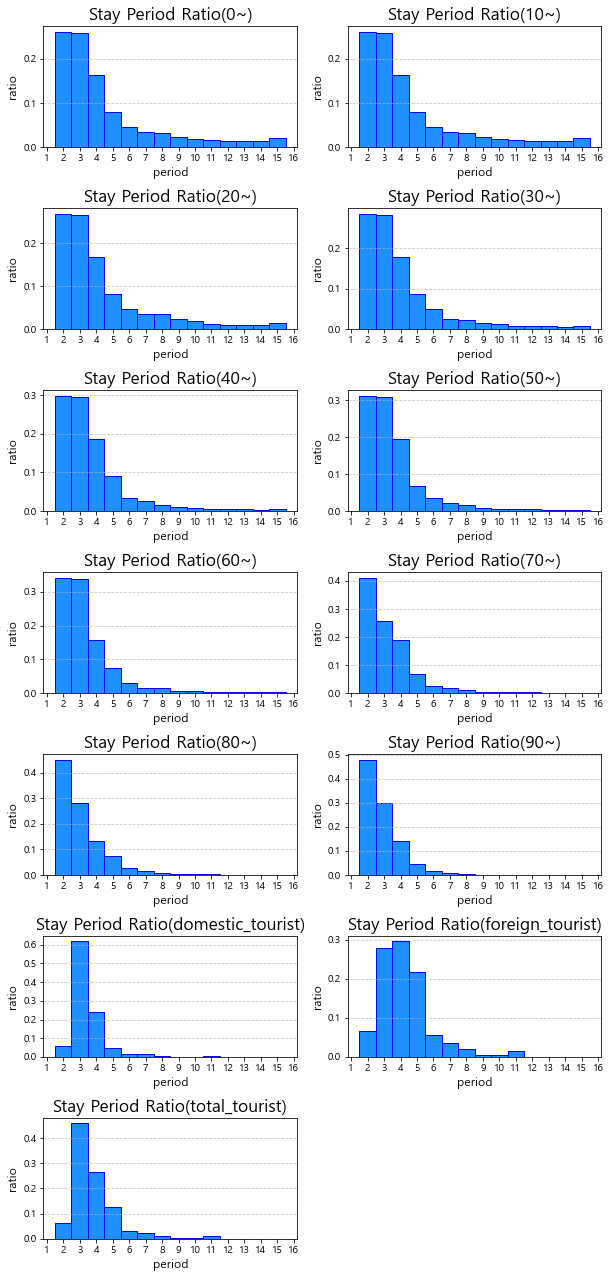

In [104]:
df = merged_stay_period_df

y_columns = list(df.columns)
y_columns.remove("period")

titles = pd.Series(y_columns).apply(lambda x : "Stay Period Ratio(%s)"%x)

plt.figure(figsize=(10, 40))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.5)
draw_bar_graph_from_df_by_all_columns(df, "period", y_columns, titles, "period", "ratio")

#### 6.6 Analysis of similarity between tag and statstical data

In [105]:
# 전체 이용자 및 4가지 유형별 이용자에 대한 유사도 계산 및 출력
type_list = list(merged_stay_period_df.columns)
remove_elements = ["period", "domestic_tourist", "foreign_tourist", "total_tourist"]
for element in remove_elements:
    type_list.remove(element)
    
for i, t in enumerate(type_list):
    intersector_ratio = STAT.how_much_overlap(merged_stay_period_df, "total_tourist", t)
    print("%12s intersection ratio = %f.3"% (t, intersector_ratio));

          0~ intersection ratio = 0.647093.3
         10~ intersection ratio = 0.647093.3
         20~ intersection ratio = 0.660898.3
         30~ intersection ratio = 0.692349.3
         40~ intersection ratio = 0.715596.3
         50~ intersection ratio = 0.712000.3
         60~ intersection ratio = 0.698710.3
         70~ intersection ratio = 0.636956.3
         80~ intersection ratio = 0.604942.3
         90~ intersection ratio = 0.579160.3
